## Introduction
### Classify fashion images on the MNIST data 
Take the alternative version of the famous “MNIST dataset”, which consists of images of Zalando’s
articles. Your task is to correctly classify the images into one of the ten categories, such as dress
or shirt. The images are in exactly the same format as we saw for the handwritten digits: 28x28
pixel grayscale images. The task is to build deep neural network models to predict the items. You
can use either sklearn or keras; to get the data, go to the corresponding Kaggle page or use
the fashion_mnist.load_data() function from the keras.datasets module. Make sure you split
the training set into two sets: one for training your models on and one for validation and model
selection. You can work with a relatively small train set if you have computational problems.

### Import libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.regularizers import l1
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Rescaling, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.applications import VGG16, MobileNet
from tensorflow.image import resize
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
from skimage.transform import resize
from keras.applications.mobilenet import preprocess_input
import tensorflow as tf
from keras.applications import MobileNetV2

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Question 1
What would be an appropriate metric to evaluate your models? Why?

**Answer 1**

The most appropriate metric for evaluating models on the Fashion MNIST dataset is accuracy. Accuracy measures the percentage of correctly classified images across all categories (dress, t-shirt, etc.). Since the goal is to maximize the number of correctly identified fashion items, and we have a balanced dataset, accuracy provides a direct and intuitive evaluation of model performance.

### Question 2
Get the data and show some example images from the data.

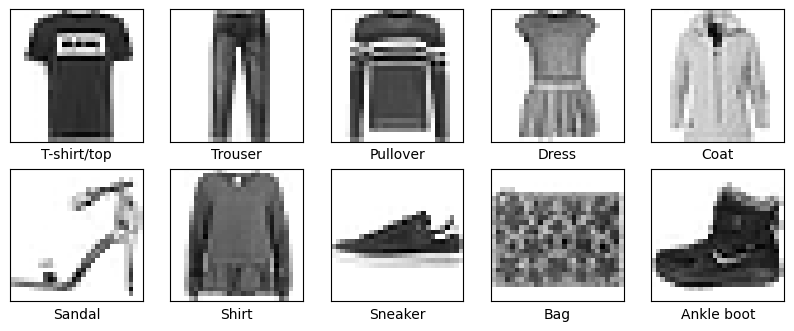

In [2]:
# define random seed for reproducibility
prng = np.random.RandomState(20240402)

# load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# define the class names of the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot an example image for each class in the Fashion MNIST dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[train_labels == i][0], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])

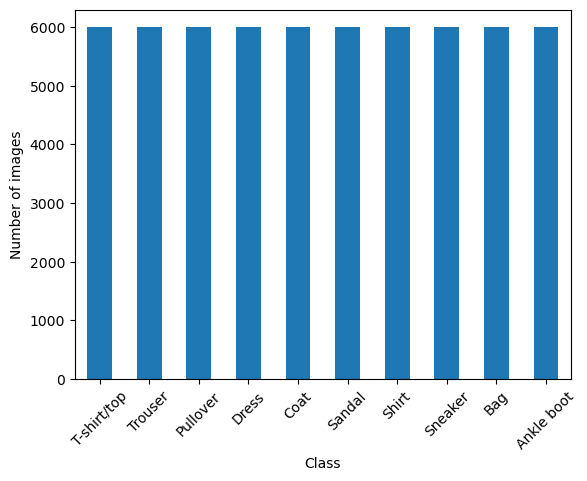

,train,test
T-shirt/top,6000,1000
Trouser,6000,1000
Pullover,6000,1000
Dress,6000,1000
Coat,6000,1000
Sandal,6000,1000
Shirt,6000,1000
Sneaker,6000,1000
Bag,6000,1000
Ankle boot,6000,1000


In [3]:
# count the number of images in each class in the Fashion MNIST dataset
class_counts = pd.Series(train_labels).value_counts().sort_index()
plt.figure()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.xticks(range(10), class_names, rotation=45)
plt.show()

# print the count of images in each class in the Fashion MNIST dataset in both test and train sets in a tabular format using class names
class_counts = pd.DataFrame({'train': pd.Series(train_labels).value_counts().sort_index(),
                              'test': pd.Series(test_labels).value_counts().sort_index()})
class_counts.index = class_names
class_counts


**Answer 2**

 We loaded the Fashion MNIST dataset, defined class names for clarity, and plotted an example image for each of the ten classes to visually understand the types of items in the dataset. Additionally, we counted and visualized the number of images per class in both the training and test sets, revealing the distribution and ensuring a balanced dataset, which is crucial for training unbiased models. 

### Question 3
Train a simple fully connected single hidden layer network to predict the items.
Remember to normalize the data similar to what we did in class. Make sure that you use
enough epochs so that the validation error begins to level off - provide a plot of the training
history.

In [4]:
# split the training set into a training set and a validation set
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=prng)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7683 - loss: 0.6682 - val_accuracy: 0.8511 - val_loss: 0.4088
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8570 - loss: 0.4040 - val_accuracy: 0.8589 - val_loss: 0.3830
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8724 - loss: 0.3542 - val_accuracy: 0.8687 - val_loss: 0.3567
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8832 - loss: 0.3198 - val_accuracy: 0.8743 - val_loss: 0.3412
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8886 - loss: 0.3026 - val_accuracy: 0.8755 - val_loss: 0.3395
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8995 - loss: 0.2791 - val_accuracy: 0.8773 - val_loss: 0.3336
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8995 - loss: 0.2697 - val_accuracy: 0.8777 - val_loss: 0.3404
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9011 - loss: 0.26

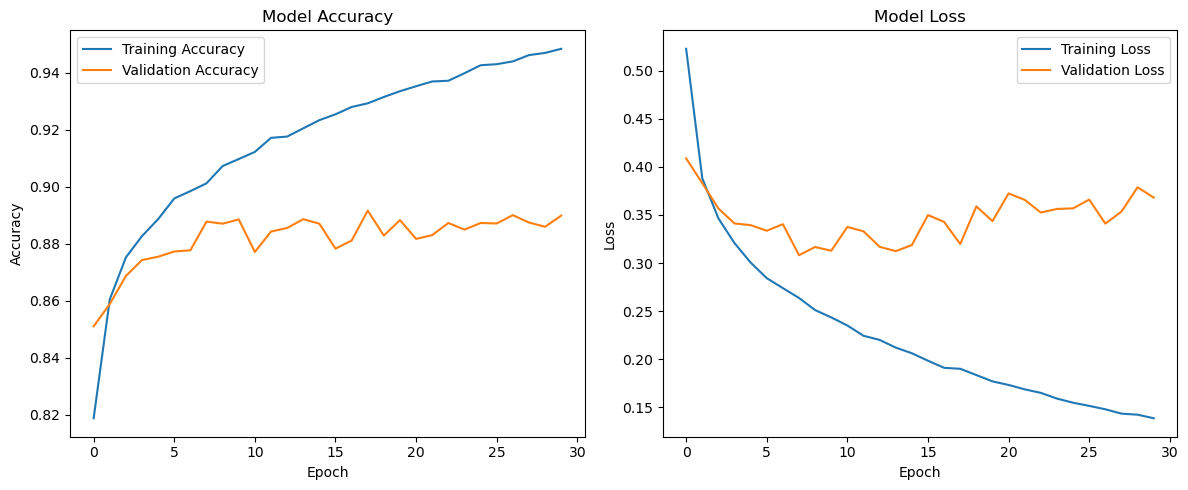

In [5]:
# Function to build the model
def build_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Rescaling(1./255),
        Dense(128, activation='relu'),  # Using 128 units in the hidden layer as an example
        Dense(num_classes, activation='softmax')
    ])
    return model

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

# Assuming the class names are already defined and we have 10 classes
num_classes = len(class_names)

# Build the model
model = build_model(input_shape=(28, 28), num_classes=num_classes)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
print(model.summary())

# Train the model
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))

# Plotting function
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


In [6]:
# print the highest validation accuracy and the epoch at which it was obtained
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_accuracy = history.history['val_accuracy'][best_epoch - 1]
print(f'Best validation accuracy: {best_val_accuracy:.4f} at epoch {best_epoch}')
# print the smallest validation loss and the epoch at which it was obtained
best_epoch_loss = np.argmin(history.history['val_loss']) + 1
best_val_loss = history.history['val_loss'][best_epoch_loss - 1]
print(f'Best validation loss: {best_val_loss:.4f} at epoch {best_epoch_loss}')

Best validation accuracy: 0.8917 at epoch 18
Best validation loss: 0.3082 at epoch 8


When training the model for 30 epochs, we observe that the accuracy on the training data consistently increases, suggesting the model is learning and adapting well to the training set. In contrast, the validation accuracy improves at the beginning but then stabilizes around 89% (epoch 13), showing limited gains from additional training past a certain point. The validation loss decreases initially but then starts to vary and generally trend upwards, which can indicate that the model is overfitting to the training data and not generalizing as effectively to new, unseen data. The divergence between training performance and validation performance suggests that improvements could be made, potentially by tuning the model or using regularization strategies to achieve better generalization.

### Question 4

Experiment with different network architectures and settings (number of hidden
layers, number of nodes, regularization, etc.). Train at least 3 models. Explain what you
have tried and how it worked.

Let's outline seven different models with varying architectures to experiment with:

- Model 1: Two hidden layers with increasing number of nodes.
- Model 2: Two hidden layers with decreasing number of nodes.
- Model 3: Two hidden layers with dropout regularization.
- Model 4: Three hidden layers
- Model 5: Two hidden layers with L1 regularization (LASSO)
- Model 6: Two hidden layers with L1 regularization and dropout
- Model 7: Three hidden layers with L1 regularization and dropout

#### Model 1: Two hidden layers with increasing number of nodes

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,674 (1.29 MB)

 Trainable params: 337,674 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7755 - loss: 0.6186 - val_accuracy: 0.8403 - val_loss: 0.4296
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8620 - loss: 0.3745 - val_accuracy: 0.8574 - val_loss: 0.3806
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8775 - loss: 0.3301 - val_accuracy: 0.8730 - val_loss: 0.3434
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8856 - loss: 0.3088 - val_accuracy: 0.8660 - val_loss: 0.3716
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8931 - loss: 0.2844 - val_accuracy: 0.8767 - val_loss: 0.3367
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8976 - loss: 0.2698 - val_accuracy: 0.8703 - val_loss: 0.3498
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9035 - loss: 0.2571 - val_accuracy: 0.8741 - val_loss: 0.3520
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9105 - loss: 0.2424 - val_accurac

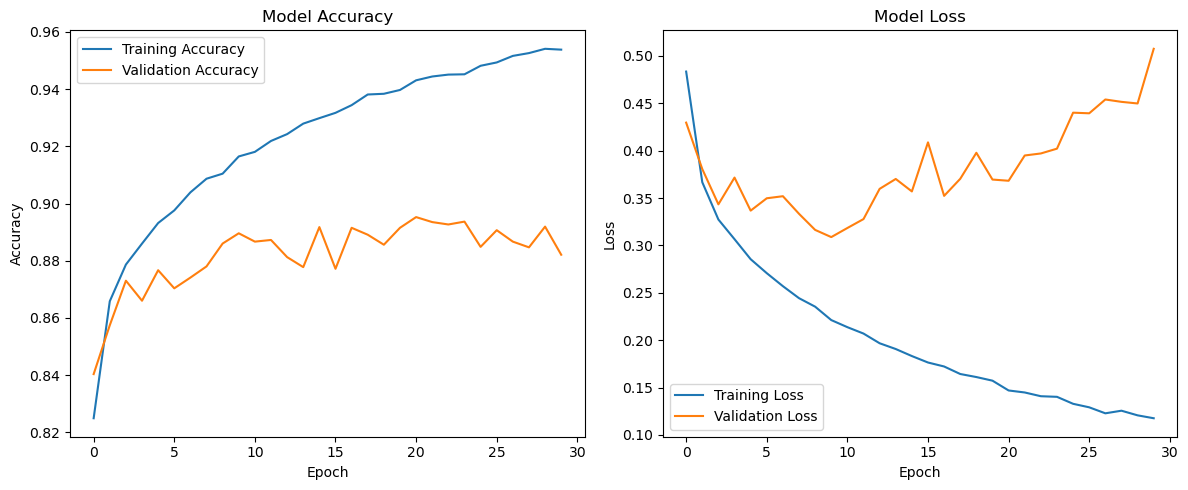

In [7]:
# build Model 1
def build_model_1(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Rescaling(1./255),  # Normalization layer
        Dense(256, activation='relu'),  # First hidden layer with more nodes
        Dense(512, activation='relu'),  # Second hidden layer with even more nodes
        Dense(num_classes, activation='softmax')  # Output layer with 10 classes
    ])
    return model


# build and compile Model 1
model_1 = build_model_1(input_shape=(28, 28), num_classes=num_classes)
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summarize Model 1
model_1.summary()

# train Model 1
history_1 = model_1.fit(
    train_images, train_labels, 
    epochs=30, 
    validation_data=(val_images, val_labels)
)

# use the existing function to plot the training history for Model 1
plot_training_history(history_1)


In [8]:
# print the highest validation accuracy and the epoch at which it was obtained for Model 1
best_epoch_1 = np.argmax(history_1.history['val_accuracy']) + 1
best_val_accuracy_1 = history_1.history['val_accuracy'][best_epoch_1 - 1]
print(f'Best validation accuracy: {best_val_accuracy_1:.4f} at epoch {best_epoch_1}')
# print the smallest validation loss and the epoch at which it was obtained for Model 1
best_epoch_loss_1 = np.argmin(history_1.history['val_loss']) + 1
best_val_loss_1 = history_1.history['val_loss'][best_epoch_loss_1 - 1]
print(f'Smallest validation loss: {best_val_loss_1:.4f} at epoch {best_epoch_loss_1}')

Best validation accuracy: 0.8953 at epoch 21
Smallest validation loss: 0.3088 at epoch 10


For Model 1, the performance metrics indicate that as the model capacity increased with additional neurons, it could capture more complex patterns in the data, shown by the rising training accuracy. However, the validation accuracy stabilizes around epoch 21 (accuracy 0.8953), with no significant gains afterward, suggesting that beyond this point, additional training may lead to overfitting rather than improved generalization. This is confirmed by the validation loss, which reaches its lowest point at epoch 10 and then gradually increases, a classic indicator that the model has started to overfit to the training data. 

#### Model 2: Two hidden layers with decreasing number of nodes.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7811 - loss: 0.6150 - val_accuracy: 0.8242 - val_loss: 0.4826
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8648 - loss: 0.3735 - val_accuracy: 0.8601 - val_loss: 0.3709
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8782 - loss: 0.3264 - val_accuracy: 0.8696 - val_loss: 0.3577
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8885 - loss: 0.3044 - val_accuracy: 0.8697 - val_loss: 0.3500
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8955 - loss: 0.2814 - val_accuracy: 0.8741 - val_loss: 0.3452
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8987 - loss: 0.2741 - val_accuracy: 0.8800 - val_loss: 0.3177
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9042 - loss: 0.2538 - val_accuracy: 0.8913 - val_loss: 0.3049
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9082 - loss: 0.2415 - val_accurac

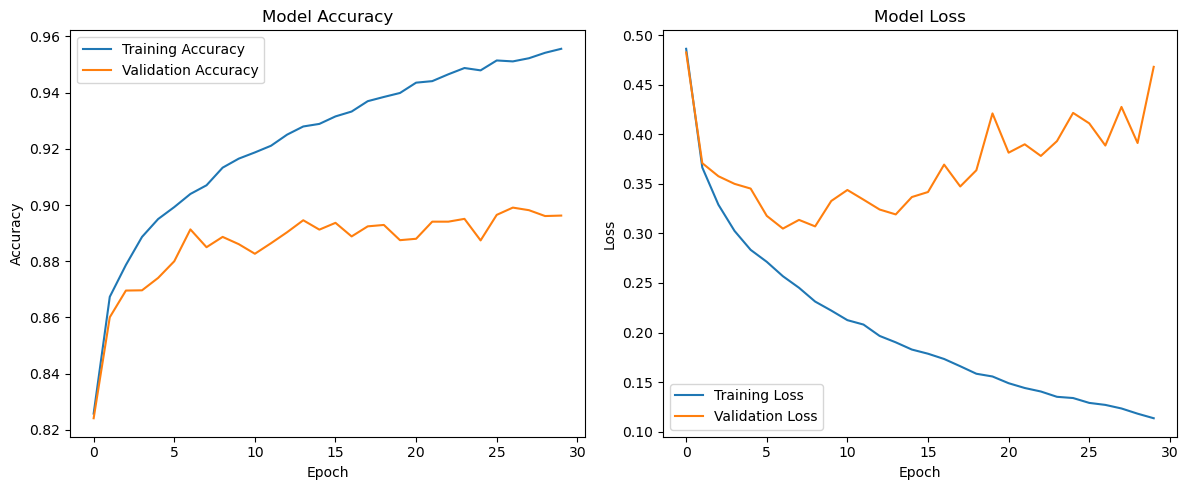

In [9]:
# build Model 2 with two hidden layers that decrease in size
model_2 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Rescaling(1./255),  # Normalization layer
    Dense(512, activation='relu'),  # First hidden layer with more nodes
    Dense(256, activation='relu'),  # Second hidden layer with fewer nodes
    Dense(num_classes, activation='softmax')  # Output layer with 10 classes
])

# bompile Model 2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# bummarize Model 2
model_2.summary()

# Train Model 2
history_2 = model_2.fit(
    train_images, train_labels, 
    epochs=30, 
    validation_data=(val_images, val_labels)
)

# Plot the training history for Model 2
plot_training_history(history_2)


In [10]:
# print the highest validation accuracy and the epoch at which it was obtained for Model 2
best_epoch_2 = np.argmax(history_2.history['val_accuracy']) + 1
best_val_accuracy_2 = history_2.history['val_accuracy'][best_epoch_2 - 1]
print(f'Best validation accuracy: {best_val_accuracy_2:.4f} at epoch {best_epoch_2}')
# print the smallest validation loss and the epoch at which it was obtained for Model 2
best_epoch_loss_2 = np.argmin(history_2.history['val_loss']) + 1
best_val_loss_2 = history_2.history['val_loss'][best_epoch_loss_2 - 1]
print(f'Smallest validation loss: {best_val_loss_2:.4f} at epoch {best_epoch_loss_2}')

Best validation accuracy: 0.8991 at epoch 27
Smallest validation loss: 0.3049 at epoch 7


In [11]:
# put all the models in a dataframe
models = pd.DataFrame({
    'model': ['Model 0','Model 1', 'Model 2'],
    'val_accuracy': [best_val_accuracy, best_val_accuracy_1, np.max(history_2.history['val_accuracy'])],
    'val_loss': [best_val_loss, best_val_loss_1, np.min(history_2.history['val_loss'])],
    'best_epoch': [best_epoch, best_epoch_1, np.argmax(history_2.history['val_accuracy']) + 1]
})  

# print the models dataframe
models

,model,val_accuracy,val_loss,best_epoch
0,Model 0,0.891667,0.308212,18
1,Model 1,0.895250,0.308812,21
2,Model 2,0.899083,0.304872,27


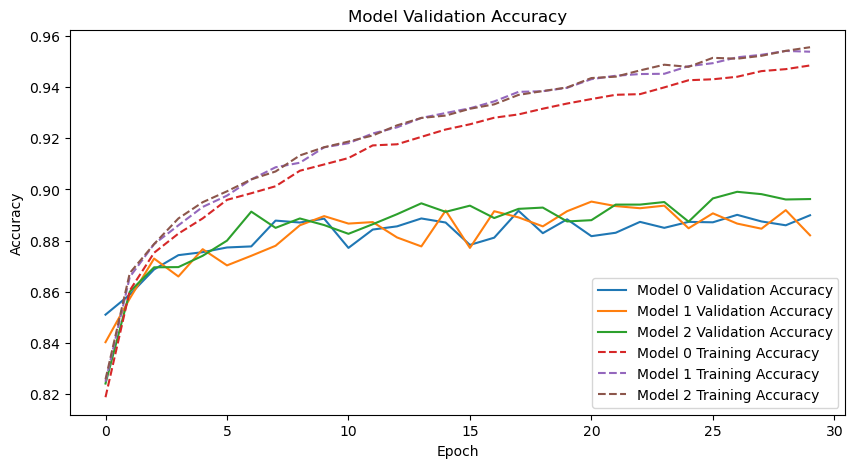

In [12]:
# plot the validation accuracy of all models and training accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_accuracy'], label='Model 0 Validation Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.plot(history.history['accuracy'], label='Model 0 Training Accuracy', linestyle='--')
plt.plot(history_1.history['accuracy'], label='Model 1 Training Accuracy', linestyle='--')
plt.plot(history_2.history['accuracy'], label='Model 2 Training Accuracy', linestyle='--')
plt.title('Model Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model 2, which features a decreasing number of nodes in its hidden layers, achieved the highest validation accuracy at epoch 27 and the lowest validation loss at epoch 7. The model's validation accuracy shows a gradual improvement without drastic fluctuations, indicating good generalization. However, the increasing validation loss after the seventh epoch suggests that while the model is confident in its predictions, it may begin to overfit as training continues. This architecture shows a promising direction, but implementing early stopping or additional regularization might be beneficial to prevent overfitting and retain the best model performance.








#### Model 3: Two hidden layers with dropout regularization.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6904 - loss: 0.8535 - val_accuracy: 0.8357 - val_loss: 0.4330
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8146 - loss: 0.5111 - val_accuracy: 0.8439 - val_loss: 0.4198
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8305 - loss: 0.4712 - val_accuracy: 0.8363 - val_loss: 0.4265
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8354 - loss: 0.4462 - val_accuracy: 0.8529 - val_loss: 0.3827
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8450 - loss: 0.4317 - val_accuracy: 0.8573 - val_loss: 0.3689
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8481 - loss: 0.4239 - val_accuracy: 0.8527 - val_loss: 0.3804
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8514 - loss: 0.4099 - val_accuracy: 0.8643 - val_loss: 0.3641
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8606 - loss: 0.3903 - 

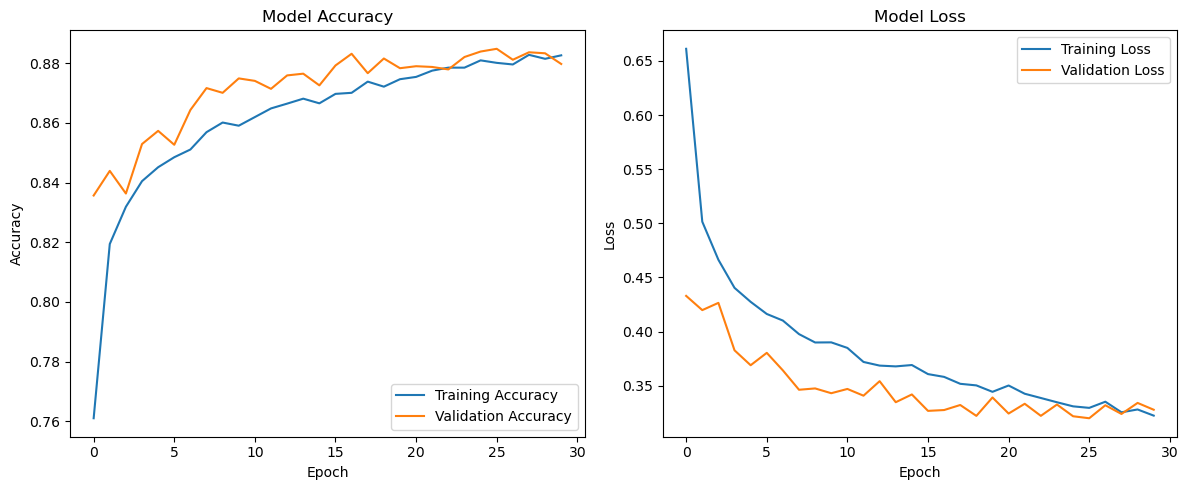

In [17]:
# Build Model 3 with two hidden layers and dropout
model_3 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Rescaling(1./255),  # Normalization layer
    Dense(512, activation='relu'),  # First hidden layer
    Dropout(0.5),  # Dropout layer after the first hidden layer
    Dense(256, activation='relu'),  # Second hidden layer
    Dropout(0.5),  # Dropout layer after the second hidden layer
    Dense(num_classes, activation='softmax')  # Output layer with 10 classes
])

# Compile Model 3
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize Model 3
model_3.summary()

# Train Model 3
history_3 = model_3.fit(
    train_images, train_labels,
    epochs=30,
    validation_data=(val_images, val_labels)
)

# Plot the training history for Model 3
plot_training_history(history_3)


In [18]:
# print the highest validation accuracy and the epoch at which it was obtained for Model 3
best_epoch_3 = np.argmax(history_3.history['val_accuracy']) + 1
best_val_accuracy_3 = history_3.history['val_accuracy'][best_epoch_3 - 1]
print(f'Best validation accuracy: {best_val_accuracy_3:.4f} at epoch {best_epoch_3}')
# print the smallest validation loss and the epoch at which it was obtained for Model 3
best_epoch_loss_3 = np.argmin(history_3.history['val_loss']) + 1
best_val_loss_3 = history_3.history['val_loss'][best_epoch_loss_3 - 1]
print(f'Smallest validation loss: {best_val_loss_3:.4f} at epoch {best_epoch_loss_3}')

Best validation accuracy: 0.8848 at epoch 26
Smallest validation loss: 0.3199 at epoch 26


In [19]:
# add Model 3 to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Model 3'],
    'val_accuracy': [best_val_accuracy_3],
    'val_loss': [best_val_loss_3],
    'best_epoch': [best_epoch_3]
})], ignore_index=True)

# print the models dataframe
models

,model,val_accuracy,val_loss,best_epoch
0,Model 0,0.891667,0.308212,18
1,Model 1,0.895250,0.308812,21
2,Model 2,0.899083,0.304872,27
3,Model 3,0.884833,0.319946,26


For Model 3, we tried incorporating dropout to reduce overfitting, applying it after two dense layers with a substantial number of nodes. The training process showed a steady increase in validation accuracy up to a peak at epoch 26, where it achieved the best accuracy and loss, suggesting that dropout helped maintain a balance between learning and overfitting. Despite this, the final accuracy wasn't as high as some of the other models we've experimented with, hinting that there might be a limit to the complexity this model can capture. This version has shown that while dropout is effective for generalization, we might need to adjust other parameters or add complexity to improve accuracy further.

#### Model 4: Three hidden layers

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,462,538 (5.58 MB)

 Trainable params: 1,462,538 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7739 - loss: 0.6226 - val_accuracy: 0.8478 - val_loss: 0.4266
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8569 - loss: 0.3917 - val_accuracy: 0.8695 - val_loss: 0.3533
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8767 - loss: 0.3321 - val_accuracy: 0.8735 - val_loss: 0.3431
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8869 - loss: 0.3074 - val_accuracy: 0.8742 - val_loss: 0.3412
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8937 - loss: 0.2838 - val_accuracy: 0.8778 - val_loss: 0.3393
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8973 - loss: 0.2727 - val_accuracy: 0.8650 - val_loss: 0.3657
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9010 - loss: 0.2601 - val_accuracy: 0.8834 - val_loss: 0.3247
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9077 - loss: 0.24

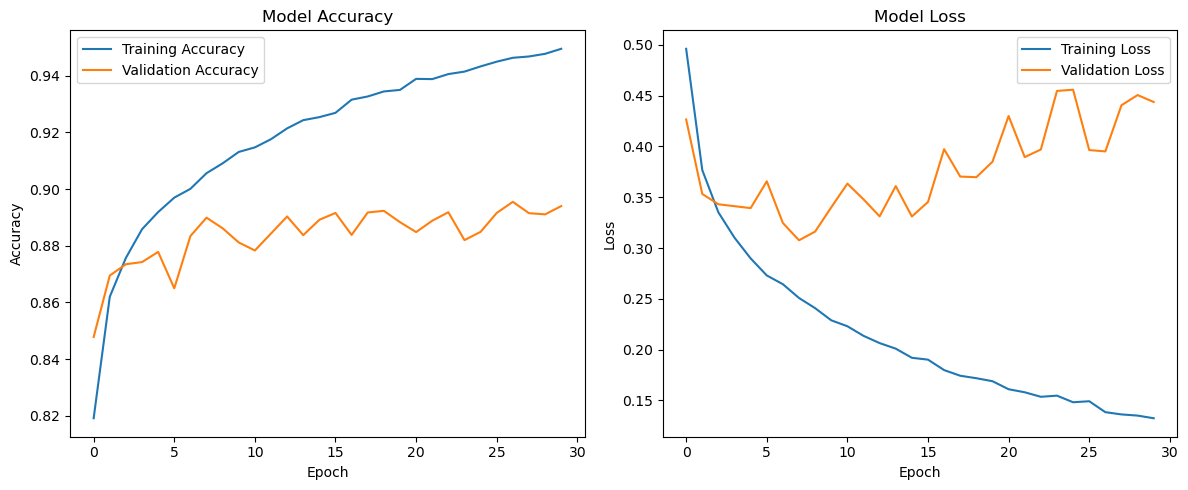

In [20]:
# Build Model 4 with three hidden layers in a funnel architecture
model_4 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Rescaling(1./255),  # Normalization layer
    Dense(1024, activation='relu'),  # First hidden layer with 1024 nodes
    Dense(512, activation='relu'),    # Second hidden layer with 512 nodes
    Dense(256, activation='relu'),    # Third hidden layer with 256 nodes
    Dense(num_classes, activation='softmax')  # Output layer with 10 classes
])

# Compile Model 4
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize Model 4
model_4.summary()

# Train Model 4
history_4 = model_4.fit(
    train_images, train_labels, 
    epochs=30, 
    validation_data=(val_images, val_labels)
)

# Plot the training history for Model 4
plot_training_history(history_4)

In [21]:
# print the highest validation accuracy and the epoch at which it was obtained for Model 4
best_epoch_4 = np.argmax(history_4.history['val_accuracy']) + 1
best_val_accuracy_4 = history_4.history['val_accuracy'][best_epoch_4 - 1]
print(f'Best validation accuracy: {best_val_accuracy_4:.4f} at epoch {best_epoch_4}')
# print the smallest validation loss and the epoch at which it was obtained for Model 4
best_epoch_loss_4 = np.argmin(history_4.history['val_loss']) + 1
best_val_loss_4 = history_4.history['val_loss'][best_epoch_loss_4 - 1]
print(f'Smallest validation loss: {best_val_loss_4:.4f} at epoch {best_epoch_loss_4}')

Best validation accuracy: 0.8955 at epoch 27
Smallest validation loss: 0.3076 at epoch 8


In [22]:
# add Model 4 to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Model 4'],
    'val_accuracy': [best_val_accuracy_4],
    'val_loss': [best_val_loss_4],
    'best_epoch': [best_epoch_4]
})], ignore_index=True)

# print the models dataframe
models

,model,val_accuracy,val_loss,best_epoch
0,Model 0,0.891667,0.308212,18
1,Model 1,0.895250,0.308812,21
2,Model 2,0.899083,0.304872,27
3,Model 3,0.884833,0.319946,26
4,Model 4,0.895500,0.307642,27


In Model 4, we introduced a three-layer funnel architecture, stepping down the number of neurons from 1024 to 256. This approach seeks to gradually condense the information the network learns, layer by layer. The model achieved its best validation accuracy and loss earlier in the training at epoch 27 and 8, respectively, suggesting that the added complexity of the model allowed it to learn efficiently. However, similar to previous models, the validation loss started to increase after reaching its minimum, which indicates the model began to overfit the training data as training continued․

#### Model 5: Two hidden layers with L1 regularization (LASSO)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7943 - loss: 0.7960 - val_accuracy: 0.8525 - val_loss: 0.4996
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8667 - loss: 0.4547 - val_accuracy: 0.8585 - val_loss: 0.4579
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8814 - loss: 0.4033 - val_accuracy: 0.8672 - val_loss: 0.4344
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8862 - loss: 0.3747 - val_accuracy: 0.8768 - val_loss: 0.3949
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8920 - loss: 0.3545 - val_accuracy: 0.8775 - val_loss: 0.3876
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8932 - loss: 0.3461 - val_accuracy: 0.8771 - val_loss: 0.3905
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8989 - loss: 0.3317 - val_accuracy: 0.8696 - val_loss: 0.4058
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9019 - loss: 0.3131 - val_accurac

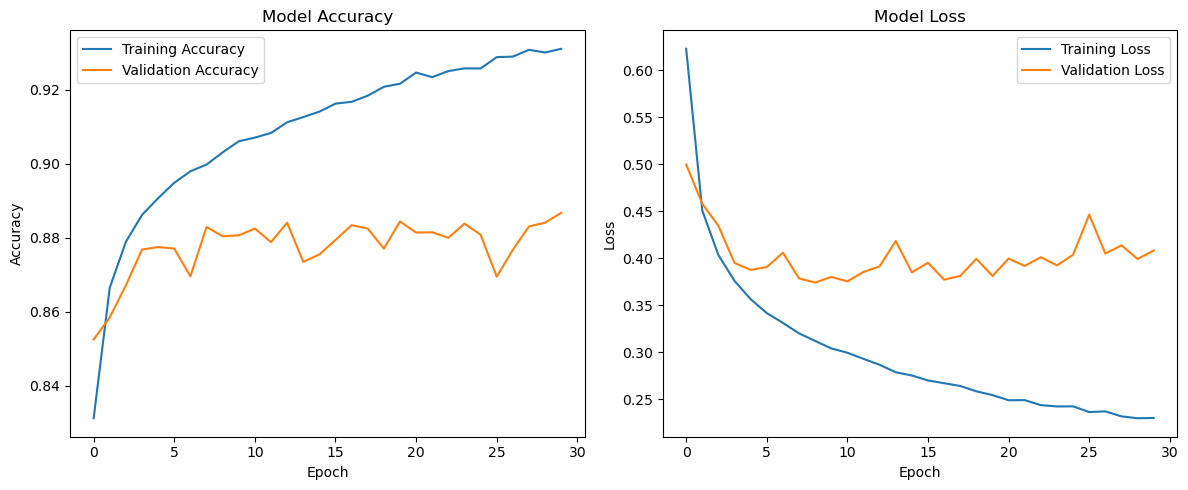

In [23]:
# model 5: two hidden layers with L1 regularization
model_5 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Rescaling(1./255),
    Dense(512, activation='relu', activity_regularizer=l1(0.0001)),  # L1 regularization
    Dense(256, activation='relu', activity_regularizer=l1(0.0001)),
    Dense(num_classes, activation='softmax')
])

model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize Model 5
model_5.summary()

# Train Model 5

history_5 = model_5.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels))

# Plot the training history for Model 5
plot_training_history(history_5)

In [24]:
# print the highest validation accuracy and the epoch at which it was obtained for Model 5
best_epoch_5 = np.argmax(history_5.history['val_accuracy']) + 1
best_val_accuracy_5 = history_5.history['val_accuracy'][best_epoch_5 - 1]
print(f'Best validation accuracy: {best_val_accuracy_5:.4f} at epoch {best_epoch_5}')
# print the smallest validation loss and the epoch at which it was obtained for Model 5
best_epoch_loss_5 = np.argmin(history_5.history['val_loss']) + 1
best_val_loss_5 = history_5.history['val_loss'][best_epoch_loss_5 - 1]
print(f'Smallest validation loss: {best_val_loss_5:.4f} at epoch {best_epoch_loss_5}')

Best validation accuracy: 0.8867 at epoch 30
Smallest validation loss: 0.3741 at epoch 9


In [25]:
# add Model 5 to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Model 5'],
    'val_accuracy': [best_val_accuracy_5],
    'val_loss': [best_val_loss_5],
    'best_epoch': [best_epoch_5]
})], ignore_index=True)

models

,model,val_accuracy,val_loss,best_epoch
0,Model 0,0.891667,0.308212,18
1,Model 1,0.895250,0.308812,21
2,Model 2,0.899083,0.304872,27
3,Model 3,0.884833,0.319946,26
4,Model 4,0.895500,0.307642,27
5,Model 5,0.886750,0.374085,30


For Model 5, we introduced L1 regularization. While this model's validation accuracy did not surpass previous models, peaking at 0.8867 at epoch 30, it maintained a competitive performance. The model achieved its lowest validation loss quite early at epoch 9, suggesting that regularization helped in preventing overfitting. However, similar to the other models, the validation loss increased as training proceeded, which could indicate a need for further regularization or a more sophisticated approach to prevent overfitting.

#### Model 6: Two hidden layers with L1 regularization and dropout

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_8 (Rescaling)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7102 - loss: 1.0657 - val_accuracy: 0.8315 - val_loss: 0.6019
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8089 - loss: 0.6808 - val_accuracy: 0.8423 - val_loss: 0.5552
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8184 - loss: 0.6382 - val_accuracy: 0.8539 - val_loss: 0.5128
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8188 - loss: 0.6151 - val_accuracy: 0.8508 - val_loss: 0.5101
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8278 - loss: 0.5943 - val_accuracy: 0.8548 - val_loss: 0.5013
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8254 - loss: 0.5959 - val_accuracy: 0.8561 - val_loss: 0.4898
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8337 - loss: 0.5779 - val_accuracy: 0.8575 - val_loss: 0.4910
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8333 - loss: 0.5744 - val_accura

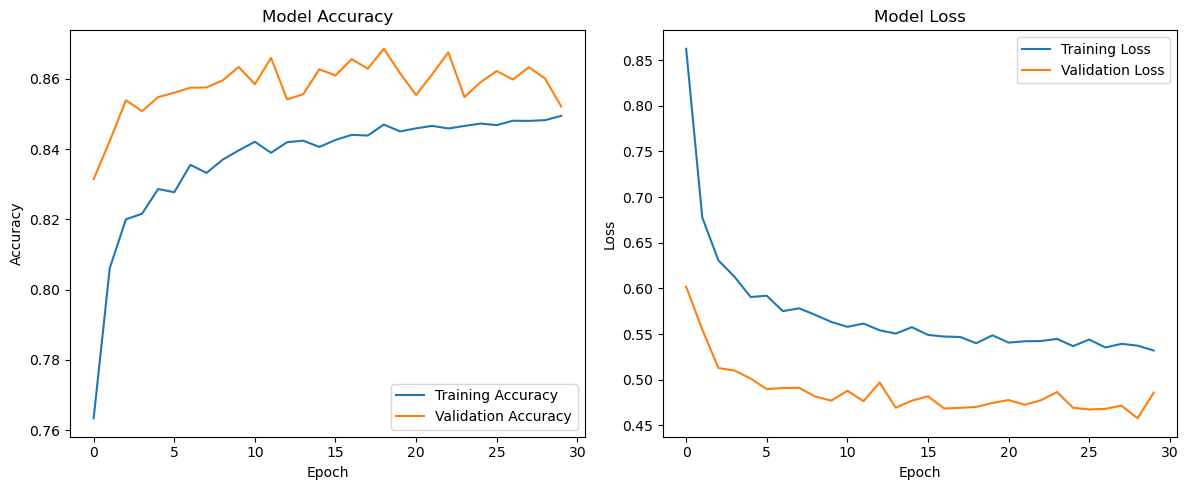

In [26]:
# model 6: two hidden layers with dropout and L1 regularization
model_6 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Rescaling(1./255),
    Dense(512, activation='relu', activity_regularizer=l1(0.0001)),
    Dropout(0.5),  # Adding dropout
    Dense(256, activation='relu', activity_regularizer=l1(0.0001)),
    Dropout(0.5),  # Adding dropout
    Dense(num_classes, activation='softmax')
])

model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_6.summary()

history_6 = model_6.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels))

plot_training_history(history_6)

In [27]:
# print the highest validation accuracy and the epoch at which it was obtained for Model 6
best_epoch_6 = np.argmax(history_6.history['val_accuracy']) + 1
best_val_accuracy_6 = history_6.history['val_accuracy'][best_epoch_6 - 1]
print(f'Best validation accuracy: {best_val_accuracy_6:.4f} at epoch {best_epoch_6}')
# print the smallest validation loss and the epoch at which it was obtained for Model 6
best_epoch_loss_6 = np.argmin(history_6.history['val_loss']) + 1
best_val_loss_6 = history_6.history['val_loss'][best_epoch_loss_6 - 1]
print(f'Smallest validation loss: {best_val_loss_6:.4f} at epoch {best_epoch_loss_6}')

Best validation accuracy: 0.8686 at epoch 19
Smallest validation loss: 0.4579 at epoch 29


In [28]:
# add Model 6 to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Model 6'],
    'val_accuracy': [best_val_accuracy_6],
    'val_loss': [best_val_loss_6],
    'best_epoch': [best_epoch_6]
})], ignore_index=True)

models

,model,val_accuracy,val_loss,best_epoch
0,Model 0,0.891667,0.308212,18
1,Model 1,0.895250,0.308812,21
2,Model 2,0.899083,0.304872,27
3,Model 3,0.884833,0.319946,26
4,Model 4,0.895500,0.307642,27
5,Model 5,0.886750,0.374085,30
6,Model 6,0.868583,0.457896,19


For Model 6, we incorporated L1 regularization and dropout into the network, aiming to prevent overfitting by encouraging simpler models and reducing neuron co-dependency. This resulted in the highest validation accuracy at epoch 19, indicating a good fit at this point in the training. The model achieved its lowest validation loss at epoch 29, where the combined effects of L1 and dropout effectively minimized overfitting. However, this approach did seem to limit the model's overall accuracy potential compared to previous models without these regularization techniques.

#### Model 7: Three hidden layers with L1 regularization and dropout

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_9 (Rescaling)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,462,538 (5.58 MB)

 Trainable params: 1,462,538 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6633 - loss: 1.2358 - val_accuracy: 0.8167 - val_loss: 0.6606
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7721 - loss: 0.7801 - val_accuracy: 0.8266 - val_loss: 0.6183
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7876 - loss: 0.7307 - val_accuracy: 0.8305 - val_loss: 0.5918
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7953 - loss: 0.7002 - val_accuracy: 0.8313 - val_loss: 0.5784
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7888 - loss: 0.7098 - val_accuracy: 0.8400 - val_loss: 0.5590
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7903 - loss: 0.6952 - val_accuracy: 0.8453 - val_loss: 0.5383
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7919 - loss: 0.6847 - val_accuracy: 0.8317 - val_loss: 0.5559
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7993 - loss: 0.67

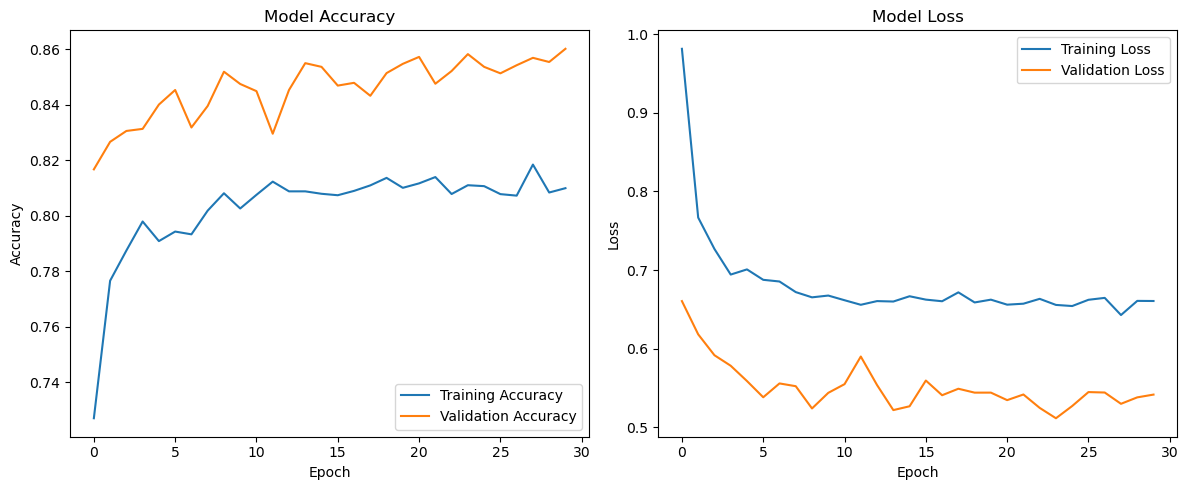

In [29]:
# build model 7: three hidden layers with dropout and L1 regularization
model_7 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Rescaling(1./255),
    Dense(1024, activation='relu', activity_regularizer=l1(0.0001)),  # Increased number of nodes
    Dropout(0.5),  # Adding dropout
    Dense(512, activation='relu', activity_regularizer=l1(0.0001)),
    Dropout(0.5),  # Adding dropout
    Dense(256, activation='relu', activity_regularizer=l1(0.0001)),  # Third hidden layer
    Dropout(0.5),  # Adding dropout
    Dense(num_classes, activation='softmax')
])

model_7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_7.summary()

history_7 = model_7.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels))

plot_training_history(history_7)

In [30]:
# print the highest validation accuracy and the epoch at which it was obtained for Model 7
best_epoch_7 = np.argmax(history_7.history['val_accuracy']) + 1
best_val_accuracy_7 = history_7.history['val_accuracy'][best_epoch_7 - 1]
print(f'Best validation accuracy: {best_val_accuracy_7:.4f} at epoch {best_epoch_7}')
# print the smallest validation loss and the epoch at which it was obtained for Model 7
best_epoch_loss_7 = np.argmin(history_7.history['val_loss']) + 1
best_val_loss_7 = history_7.history['val_loss'][best_epoch_loss_7 - 1]
print(f'Smallest validation loss: {best_val_loss_7:.4f} at epoch {best_epoch_loss_7}')

Best validation accuracy: 0.8601 at epoch 30
Smallest validation loss: 0.5116 at epoch 24


In [31]:
# add Model 7 to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Model 7'],
    'val_accuracy': [best_val_accuracy_7],
    'val_loss': [best_val_loss_7],
    'best_epoch': [best_epoch_7]
})], ignore_index=True)

# add new ranking columns based on validation accuracy
models['val_accuracy_rank'] = models['val_accuracy'].rank(ascending=False).astype(int)

models

,model,val_accuracy,val_loss,best_epoch,val_accuracy_rank
0,Model 0,0.891667,0.308212,18,4
1,Model 1,0.895250,0.308812,21,3
2,Model 2,0.899083,0.304872,27,1
3,Model 3,0.884833,0.319946,26,6
4,Model 4,0.895500,0.307642,27,2
5,Model 5,0.886750,0.374085,30,5
6,Model 6,0.868583,0.457896,19,7
7,Model 7,0.860083,0.511647,30,8


For Model 7, we incorporated a complex architecture with three dense layers and combined L1 regularization with dropout in an attempt to manage overfitting while encouraging model sparsity. However, the results showed that while the model's performance on the validation set improved gradually, it did not surpass the best models from our previous experiments. With a best validation accuracy of 86.01% at epoch 30 and a lowest validation loss occurring much earlier at epoch 24, it suggests that while regularization helps in combating overfitting, the model might be too complex or not have the right balance between regularization and capacity.

Throughout our experimentation, we built and evaluated seven different models with varying complexities and regularization techniques, aiming to optimize the validation accuracy while minimizing the loss. The second model emerged as the top performer with the highest validation accuracy, indicating a suitable balance between model complexity and ability to generalize. It's evident that the addition of more layers and regularization did not linearly correlate with better performance, emphasizing the importance of finding the right architecture and hyperparameters for the dataset at hand. Overall, the experiments provided valuable insights into the trade-offs between model complexity, overfitting, and predictive power.

### Question 5
Try to improve the accuracy of your model by using convolution. Train at least
two different models (you can vary the number of convolutional and pooling layers or whether
you include a fully connected layer before the output, etc.).

To enhance accuracy, we've decided to incorporate convolution into the next set of models:

- Model A: Basic Convolutional Model - Starts with a single convolutional layer, a max-pooling layer for spatial reduction, flattened into a dense layer, and then the output layer.

- Model B: Deep Convolutional Model - Features multiple convolutional layers with an increasing number of filters and interleaved max-pooling layers, concluding with a dense layer before the output.

- Model C: Deeper Convolutional Neural Network with Adjusted Dropout Rates - This is a further adjustment of Model B

- Model D: Optimized deep convolutional network

#### Model A: Basic Convulutional Model

d:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7523 - loss: 6.1269 - val_accuracy: 0.8639 - val_loss: 0.3874
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8889 - loss: 0.3178 - val_accuracy: 0.8792 - val_loss: 0.3463
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9105 - loss: 0.2514 - val_accuracy: 0.8920 - val_loss: 0.3065
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9246 - loss: 0.2071 - val_accuracy: 0.8811 - val_loss: 0.3423
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9294 - loss: 0.1906 - val_accuracy: 0.8940 - val_loss: 0.3260
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9354 - loss: 0.1762 - val_accuracy: 0.8966 - val_loss: 0.3239
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9402 - loss: 0.1580 - val_accuracy: 0.8862 - val_loss: 0.3647
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9481 - loss: 0.1444 - val_acc

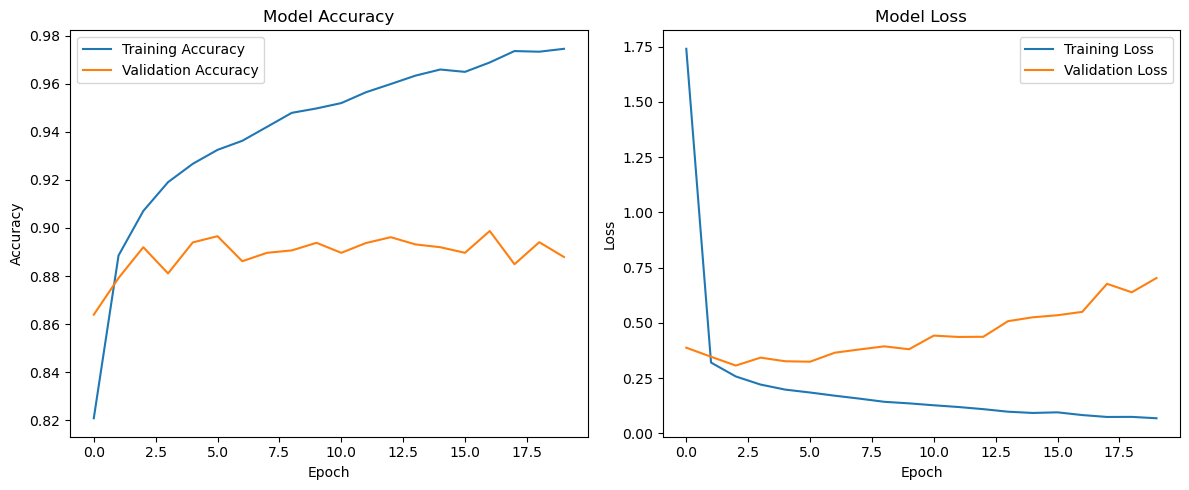

In [36]:
model_a = Sequential([
    # convolutional layer with 32 filters, a kernel size of 3, and ReLU activation
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # MaxPooling layer with a pool size of 2
    MaxPooling2D(pool_size=(2, 2)),
    # flatten the 3D output to 1D
    Flatten(),
    # dense layer with 128 units and ReLU activation
    Dense(128, activation='relu'),
    # output layer with 10 units (for 10 classes) with softmax activation
    Dense(10, activation='softmax')
])

# compile the model
model_a.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_a.summary()

# train the model with training data and validation data
history_a = model_a.fit(
    train_images, 
    train_labels,  
    batch_size=64, 
    epochs=20,     
    validation_data=(val_images, val_labels)
)

# plot the training history
plot_training_history(history_a)

In [37]:
# print the highest validation accuracy and the epoch at which it was obtained for Model A
best_epoch_a = np.argmax(history_a.history['val_accuracy']) + 1
best_val_accuracy_a = history_a.history['val_accuracy'][best_epoch_a - 1]
print(f'Best validation accuracy: {best_val_accuracy_a:.4f} at epoch {best_epoch_a}')
# print the smallest validation loss and the epoch at which it was obtained for Model A
best_epoch_loss_a = np.argmin(history_a.history['val_loss']) + 1
best_val_loss_a = history_a.history['val_loss'][best_epoch_loss_a - 1]
print(f'Smallest validation loss: {best_val_loss_a:.4f} at epoch {best_epoch_loss_a}')

Best validation accuracy: 0.8988 at epoch 17
Smallest validation loss: 0.3065 at epoch 3


In [38]:
# add Model A to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Model A'],
    'val_accuracy': [best_val_accuracy_a],
    'val_loss': [best_val_loss_a],
    'best_epoch': [best_epoch_a]
})], ignore_index=True)

models

,model,val_accuracy,val_loss,best_epoch,val_accuracy_rank
0,Model 0,0.891667,0.308212,18,4.0
1,Model 1,0.895250,0.308812,21,3.0
2,Model 2,0.899083,0.304872,27,1.0
3,Model 3,0.884833,0.319946,26,6.0
4,Model 4,0.895500,0.307642,27,2.0
5,Model 5,0.886750,0.374085,30,5.0
6,Model 6,0.868583,0.457896,19,7.0
7,Model 7,0.860083,0.511647,30,8.0
8,Model 8,0.859750,0.514985,39,NaN
9,Model A,0.898750,0.306537,17,NaN


For Model A, we implemented a convolutional neural network with one convolutional layer followed by a max-pooling layer to extract features from the images. This model achieved a notable improvement in validation accuracy, indicating the effectiveness of convolutional layers for image classification tasks. However, the model began to show signs of overfitting as the training loss continued to decrease while the validation loss increased after a certain number of epochs. 

#### Model B: Deep Convolutional Model

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6328 - loss: 1.0025 - val_accuracy: 0.8622 - val_loss: 0.3871
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8308 - loss: 0.4609 - val_accuracy: 0.8712 - val_loss: 0.3317
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8586 - loss: 0.3852 - val_accuracy: 0.8858 - val_loss: 0.2986
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8714 - loss: 0.3562 - val_accuracy: 0.8979 - val_loss: 0.2735
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8793 - loss: 0.3312 - val_accuracy: 0.8982 - val_loss: 0.2684
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8843 - loss: 0.3121 - val_accuracy: 0.9014 - val_loss: 0.2591
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8872 - loss: 0.3121 - val_accuracy: 0.9031 - val_loss: 0.2565
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8955 -

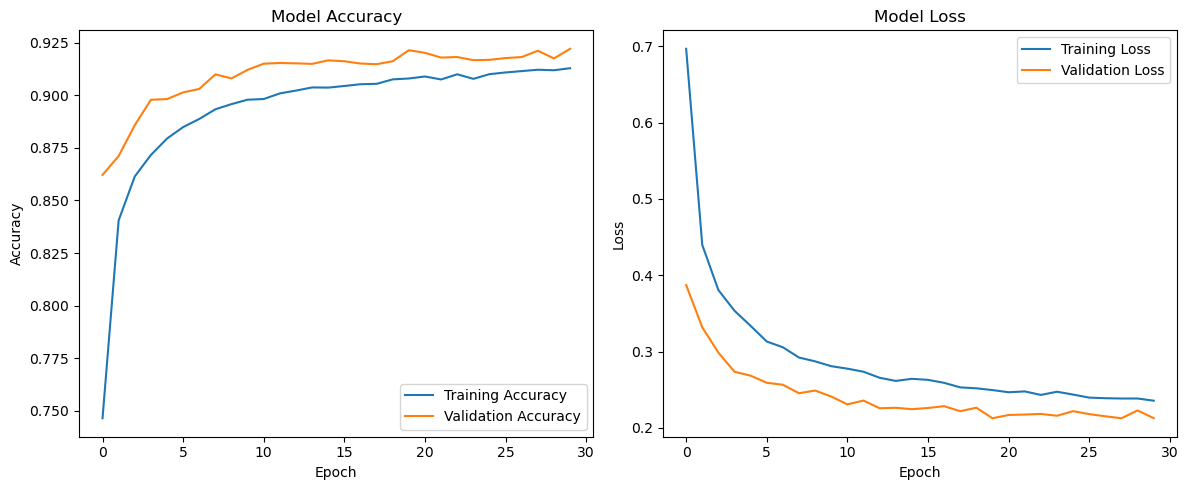

In [39]:
# build Model B with three convolutional blocks
model_b = Sequential([
    Input(shape=(28, 28, 1)),
    Rescaling(1./255), 
    
    # First Convolutional Block
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout to prevent overfitting

    # Second Convolutional Block
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_b.summary()


history_b = model_b.fit(
    train_images, train_labels, 
    epochs=30, 
    validation_data=(val_images, val_labels)
)

plot_training_history(history_b)

In [40]:
# print the highest validation accuracy and the epoch at which it was obtained for Model B
best_epoch_b = np.argmax(history_b.history['val_accuracy']) + 1
best_val_accuracy_b = history_b.history['val_accuracy'][best_epoch_b - 1]
print(f'Best validation accuracy: {best_val_accuracy_b:.4f} at epoch {best_epoch_b}')
# print the smallest validation loss and the epoch at which it was obtained for Model B
best_epoch_loss_b = np.argmin(history_b.history['val_loss']) + 1
best_val_loss_b = history_b.history['val_loss'][best_epoch_loss_b - 1]
print(f'Smallest validation loss: {best_val_loss_b:.4f} at epoch {best_epoch_loss_b}')

Best validation accuracy: 0.9222 at epoch 30
Smallest validation loss: 0.2126 at epoch 28


In [41]:
# add Model B to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Model B'],
    'val_accuracy': [best_val_accuracy_b],
    'val_loss': [best_val_loss_b],
    'best_epoch': [best_epoch_b]
})], ignore_index=True)

models

,model,val_accuracy,val_loss,best_epoch,val_accuracy_rank
0,Model 0,0.891667,0.308212,18,4.0
1,Model 1,0.895250,0.308812,21,3.0
2,Model 2,0.899083,0.304872,27,1.0
3,Model 3,0.884833,0.319946,26,6.0
4,Model 4,0.895500,0.307642,27,2.0
5,Model 5,0.886750,0.374085,30,5.0
6,Model 6,0.868583,0.457896,19,7.0
7,Model 7,0.860083,0.511647,30,8.0
8,Model 8,0.859750,0.514985,39,NaN
9,Model A,0.898750,0.306537,17,NaN


Model B employed a more complex convolutional architecture, with deeper layering and added dropout to mitigate overfitting. This approach yielded a robust best validation accuracy of 92.22% at epoch 30, showcasing an improved performance over previous models. The smallest validation loss was notably low at 0.2126, reached at epoch 28, which indicates a consistent learning without significant overfitting. Considering this positive outcome, it's reasonable to explore further enhancements or to try a new variation in Model C.

#### Model C: Deep Convolutional Neural Network with Adjusted Dropout Rates

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 422,026 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5888 - loss: 1.0868 - val_accuracy: 0.8413 - val_loss: 0.4056
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8336 - loss: 0.4679 - val_accuracy: 0.8643 - val_loss: 0.3487
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8541 - loss: 0.4079 - val_accuracy: 0.8794 - val_loss: 0.3109
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8634 - loss: 0.3773 - val_accuracy: 0.8810 - val_loss: 0.3095
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8728 - loss: 0.3518 - val_accuracy: 0.8891 - val_loss: 0.2906
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8790 - loss: 0.3367 - val_accuracy: 0.8983 - val_loss: 0.2713
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.8871 - loss: 0.3199 - val_accuracy: 0.8979 - val_loss: 0.2696
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8878 - loss: 0.31

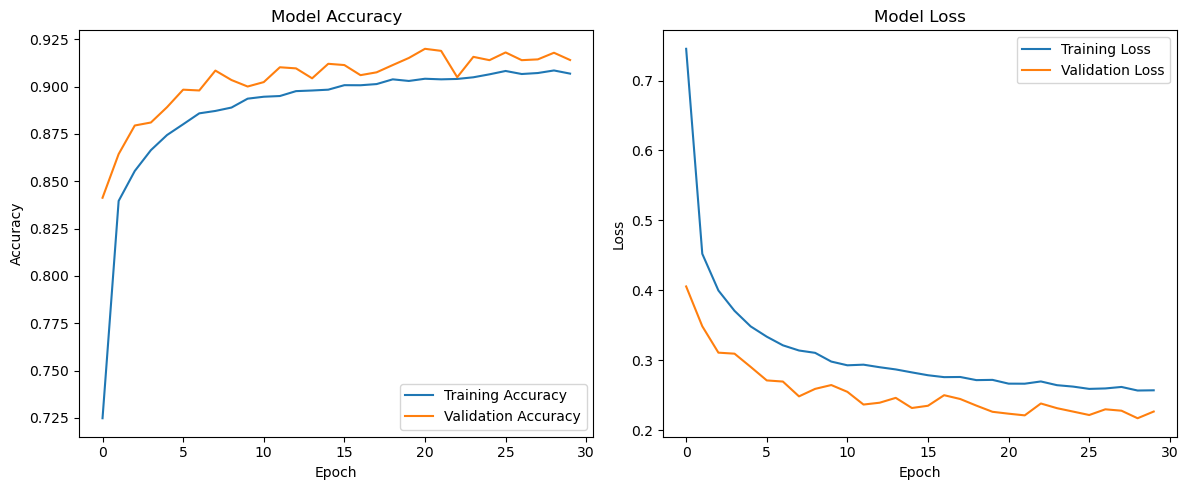

In [44]:
# Model C: A deeper convolutional model with adjusted dropout rates
model_c = Sequential([
    Input(shape=(28, 28, 1)),
    Rescaling(1./255),
    
    # First Convolutional Block
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),  # Slight dropout after initial feature extraction

    # Second Convolutional Block
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Increased dropout for more complex features

    # Third Convolutional Block
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),  

    # Fourth Convolutional Block
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4), 

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(10, activation='softmax')
])

# Compile Model C
model_c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model_c.summary()

# Train Model C
history_c = model_c.fit(
    train_images, train_labels, 
    epochs=30, 
    validation_data=(val_images, val_labels)
)

# Plot the training history for Model C
plot_training_history(history_c)

In [45]:
# print the highest validation accuracy and the epoch at which it was obtained for Model C
best_epoch_c = np.argmax(history_c.history['val_accuracy']) + 1
best_val_accuracy_c = history_c.history['val_accuracy'][best_epoch_c - 1]
print(f'Best validation accuracy: {best_val_accuracy_c:.4f} at epoch {best_epoch_c}')
# print the smallest validation loss and the epoch at which it was obtained for Model C
best_epoch_loss_c = np.argmin(history_c.history['val_loss']) + 1
best_val_loss_c = history_c.history['val_loss'][best_epoch_loss_c - 1]
print(f'Smallest validation loss: {best_val_loss_c:.4f} at epoch {best_epoch_loss_c}')

Best validation accuracy: 0.9199 at epoch 21
Smallest validation loss: 0.2172 at epoch 29


In [46]:
# add Model C to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Model C'],
    'val_accuracy': [best_val_accuracy_c],
    'val_loss': [best_val_loss_c],
    'best_epoch': [best_epoch_c]
})], ignore_index=True)

models

,model,val_accuracy,val_loss,best_epoch,val_accuracy_rank
0,Model 0,0.891667,0.308212,18,4.0
1,Model 1,0.895250,0.308812,21,3.0
2,Model 2,0.899083,0.304872,27,1.0
3,Model 3,0.884833,0.319946,26,6.0
4,Model 4,0.895500,0.307642,27,2.0
5,Model 5,0.886750,0.374085,30,5.0
6,Model 6,0.868583,0.457896,19,7.0
7,Model 7,0.860083,0.511647,30,8.0
8,Model 8,0.859750,0.514985,39,NaN
9,Model A,0.898750,0.306537,17,NaN


Adding more convulotional layers and adjusting dropout rates didn't help to improve the accuracy. Model B is still the best. Considering that we are going to focus more on optimization rather than on increasing the complexity of the model.

#### Model D: Optimized deep convolutional network

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_14 (Rescaling)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,954 (949.04 KB)

 Trainable params: 242,250 (946.29 KB)

 Non-trainable params: 704 (2.75 KB)

Learning rate:  0.0010000000474974513
Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/step - accuracy: 0.7043 - loss: 0.9113 - val_accuracy: 0.8635 - val_loss: 0.3713 - learning_rate: 0.0010
Learning rate:  0.0010000000474974513
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.8512 - loss: 0.4118 - val_accuracy: 0.8831 - val_loss: 0.2991 - learning_rate: 0.0010
Learning rate:  0.0010000000474974513
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8721 - loss: 0.3581 - val_accuracy: 0.8863 - val_loss: 0.3024 - learning_rate: 0.0010
Learning rate:  0.0010000000474974513
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.8820 - loss: 0.3277 - val_accuracy: 0.8913 - val_loss: 0.3500 - learning_rate: 0.0010
Learning rate:  0.0010000000474974513
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8870 - loss: 0.3110 - val_accuracy: 0.8942 - val_loss: 0.2687 - learning_rate: 0.0010
Learning rate:  0.001000000047

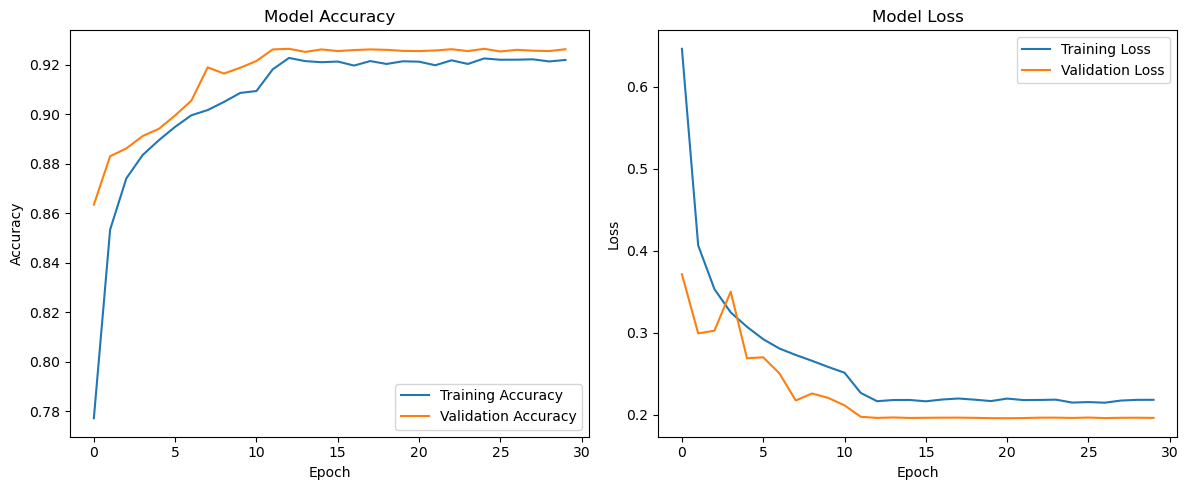

In [48]:
# Learning Rate Schedule
def lr_schedule(epoch, lr):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 20, 30, 40 epochs.
    Called automatically every epoch as part of callbacks during training.
    """
    if epoch > 40:
        lr *= 0.5e-3
    elif epoch > 30:
        lr *= 1e-3
    elif epoch > 20:
        lr *= 1e-2
    elif epoch > 10:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

# Model D: Optimized Deep Convolutional Network with Batch Normalization and Learning Rate Schedule
model_d = Sequential([
    Input(shape=(28, 28, 1)),
    Rescaling(1./255), 
    
    # First Convolutional Block
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  

    # Second Convolutional Block
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# optimizer
optimizer = Adam(learning_rate=0.001)
model_d.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_d.summary()

# set up the learning rate schedule callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Fit the model
history_d = model_d.fit(
    train_images, train_labels, 
    epochs=30, 
    validation_data=(val_images, val_labels),
    callbacks=[lr_scheduler]
)

plot_training_history(history_d)

In [49]:
# print the highest validation accuracy and the epoch at which it was obtained for Model D
best_epoch_d = np.argmax(history_d.history['val_accuracy']) + 1
best_val_accuracy_d = history_d.history['val_accuracy'][best_epoch_d - 1]
print(f'Best validation accuracy: {best_val_accuracy_d:.4f} at epoch {best_epoch_d}')
# print the smallest validation loss and the epoch at which it was obtained for Model D
best_epoch_loss_d = np.argmin(history_d.history['val_loss']) + 1
best_val_loss_d = history_d.history['val_loss'][best_epoch_loss_d - 1]
print(f'Smallest validation loss: {best_val_loss_d:.4f} at epoch {best_epoch_loss_d}')

Best validation accuracy: 0.9265 at epoch 13
Smallest validation loss: 0.1954 at epoch 21


In [50]:
# add Model D to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Model D'],
    'val_accuracy': [best_val_accuracy_d],
    'val_loss': [best_val_loss_d],
    'best_epoch': [best_epoch_d]
})], ignore_index=True)

models

,model,val_accuracy,val_loss,best_epoch,val_accuracy_rank
0,Model 0,0.891667,0.308212,18,4.0
1,Model 1,0.895250,0.308812,21,3.0
2,Model 2,0.899083,0.304872,27,1.0
3,Model 3,0.884833,0.319946,26,6.0
4,Model 4,0.895500,0.307642,27,2.0
5,Model 5,0.886750,0.374085,30,5.0
6,Model 6,0.868583,0.457896,19,7.0
7,Model 7,0.860083,0.511647,30,8.0
8,Model 8,0.859750,0.514985,39,NaN
9,Model A,0.898750,0.306537,17,NaN


In [51]:
# reset the models dataframe val_accuracy_rank column based on the new validation accuracy values
models['val_accuracy_rank'] = models['val_accuracy'].rank(ascending=False).astype(int)

models

,model,val_accuracy,val_loss,best_epoch,val_accuracy_rank
0,Model 0,0.891667,0.308212,18,8
1,Model 1,0.895250,0.308812,21,7
2,Model 2,0.899083,0.304872,27,4
3,Model 3,0.884833,0.319946,26,10
4,Model 4,0.895500,0.307642,27,6
5,Model 5,0.886750,0.374085,30,9
6,Model 6,0.868583,0.457896,19,11
7,Model 7,0.860083,0.511647,30,12
8,Model 8,0.859750,0.514985,39,13
9,Model A,0.898750,0.306537,17,5


Model D with 3 convolutional layers, pooling, batch normalization and learning rate scheduler performed really well, we got highest accuracy so far 92.7% at epoch 13.

Across models A to D, we've explored a variety of convolutional neural network architectures, progressively building complexity and incorporating techniques like dropout and batch normalization to combat overfitting. Model D shows the best performance in both validation accuracy and loss, suggesting that the combination of deep convolutional layers and additional regularization, along with learning rate scheduling, can get us better accuracy than previous models.

### Question 6
Try to use a pre-trained network to improve accuracy.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

None
Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.4525 - loss: 1.4738 - val_accuracy: 0.5366 - val_loss: 1.2618 - learning_rate: 0.0010
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.5187 - loss: 1.2923 - val_accuracy: 0.5486 - val_loss: 1.2460 - learning_rate: 0.0010
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.5325 - loss: 1.2566 - val_accuracy: 0.5500 - val_loss: 1.2542 - learning_rate: 0.0010
Epoch 4/30
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5382 - loss: 1.2415
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 49ms/step - accuracy: 0.5382 - loss: 1.2415 - val_accuracy: 0.5530 - val_loss: 1.2507 - learning_rate: 0.0010
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.5498 - loss: 1.2042 - val_accuracy: 0.5611 - val_loss: 1.2311 - learning_rate: 1.0000e-04
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step 

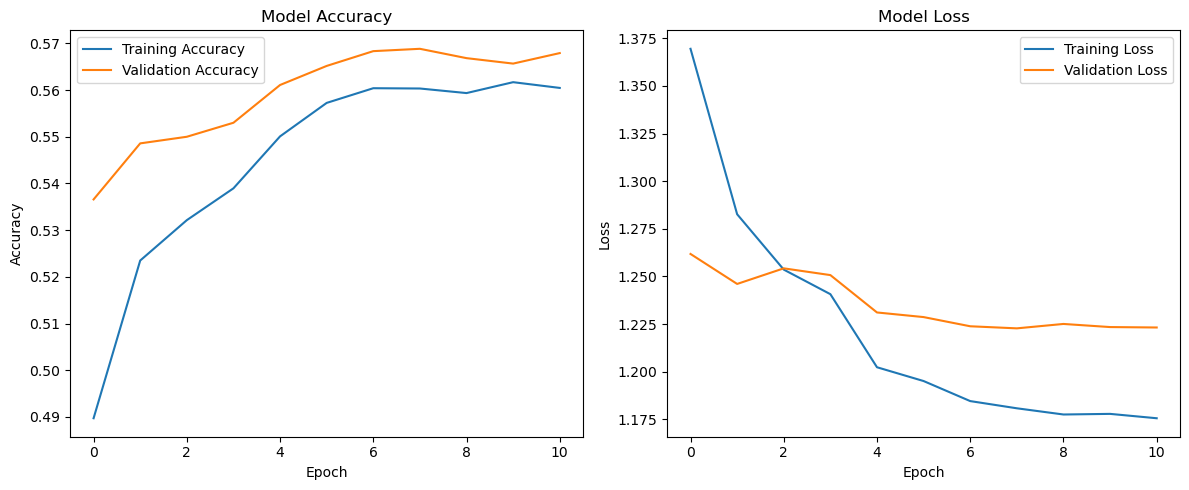

In [84]:
def pad(images):

    if images.ndim == 3:
        images = images[..., tf.newaxis]

    padding = [[0, 0], [2, 2], [2, 2], [0, 0]]
    
    # applying constant padding
    images_padded = tf.pad(images, paddings=padding, mode='CONSTANT', constant_values=0)
    return images_padded

# convert to rgb
def convert_to_rgb(images):
    images_rgb = tf.repeat(images, 3, axis=-1)
    return images_rgb

train_images_padded = pad(train_images)
val_images_padded = pad(val_images)

train_images_rgb = convert_to_rgb(train_images_padded)
val_images_rgb = convert_to_rgb(val_images_padded)

# load MobileNetV2
MobileNetV2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3), alpha=1.0)

# freeze
MobileNetV2_base.trainable = False

# Simplified model structure
custom_model = Sequential([
    MobileNetV2_base, 
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # num_classes should be defined based on your dataset
])

custom_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(custom_model.summary())

# Callbacks
callbacks_list = [
    EarlyStopping(monitor='val_accuracy', patience=3, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
]

# Training the model
history_custom_model = custom_model.fit(
    train_images_rgb, train_labels, 
    epochs=30,
    validation_data=(val_images_rgb, val_labels),
    callbacks=callbacks_list  # Using callbacks for early stopping and LR reduction
)

# Plotting utility function is assumed to be defined as before
plot_training_history(history_custom_model)

In [85]:
# print the highest validation accuracy and the epoch at which it was obtained for the custom model
best_epoch_custom_model = np.argmax(history_custom_model.history['val_accuracy']) + 1
best_val_accuracy_custom_model = history_custom_model.history['val_accuracy'][best_epoch_custom_model - 1]
print(f'Best validation accuracy: {best_val_accuracy_custom_model:.4f} at epoch {best_epoch_custom_model}')
# print the smallest validation loss and the epoch at which it was obtained for the custom model
best_epoch_loss_custom_model = np.argmin(history_custom_model.history['val_loss']) + 1
best_val_loss_custom_model = history_custom_model.history['val_loss'][best_epoch_loss_custom_model - 1]
print(f'Smallest validation loss: {best_val_loss_custom_model:.4f} at epoch {best_epoch_loss_custom_model}')

Best validation accuracy: 0.5688 at epoch 8
Smallest validation loss: 1.2227 at epoch 8


In [86]:
# add the custom model to the models dataframe
models = pd.concat([models, pd.DataFrame({
    'model': ['Custom Model'],
    'val_accuracy': [best_val_accuracy_custom_model],
    'val_loss': [best_val_loss_custom_model],
    'best_epoch': [best_epoch_custom_model]
})], ignore_index=True)

# reset the models dataframe val_accuracy_rank column based on the new validation accuracy values
models['val_accuracy_rank'] = models['val_accuracy'].rank(ascending=False).astype(int)

models

,model,val_accuracy,val_loss,best_epoch,val_accuracy_rank
0,Model 0,0.891667,0.308212,18,8
1,Model 1,0.895250,0.308812,21,7
2,Model 2,0.899083,0.304872,27,4
3,Model 3,0.884833,0.319946,26,10
4,Model 4,0.895500,0.307642,27,6
5,Model 5,0.886750,0.374085,30,9
6,Model 6,0.868583,0.457896,19,11
7,Model 7,0.860083,0.511647,30,12
8,Model 8,0.859750,0.514985,39,13
9,Model A,0.898750,0.306537,17,5


The Custom Model, incorporating MobileNetV2 as a feature extractor, shows pretty low accuracy for both training and validation. The learning rate adjustments and early stopping helped us in avoiding overfitting, but the overall performance indicates that this approach may not be the best fit for such small, grayscale images. There is a chance that other pretrained models would perform better. We have tried to use VGG16 and EfficientNetB0 models, but bumped into issues with not enough memory on the machine.

### Question 7
Select a final model and evaluate it on the test set. How does the test error compare
to the validation error?

**ANSWER**
We'll select the final model based on the best validation accuracy achieved in previous steps. From our models dataframe Model D had the highest validation accuracy, we would evaluate this model on the test set to compare its performance against the validation error.

In [89]:
# evaluate the model on the test set
test_loss, test_accuracy = model_d.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# compare the test accuracy and loss with the validation accuracy and loss from Model D
print(f"Validation Accuracy for Model D: {best_val_accuracy_d:.4f}")
print(f"Validation Loss for Model D: {best_val_loss_d:.4f}")


 11/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9265 - loss: 0.2301 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9213 - loss: 0.2141
Test Accuracy: 0.9222
Test Loss: 0.2089
Validation Accuracy for Model D: 0.9265
Validation Loss for Model D: 0.1954


Model D, when evaluated on the test set, achieved an accuracy of 92.22%, with a corresponding loss of 0.2089. Compared to the validation results, the test accuracy is slightly lower by 0.43 percentage points, and the test loss is slightly higher by about 0.0135. This slight decrease in accuracy and increase in loss on the test set, indicates that Model D is generalizing well to unseen data, with only a minor drop in performance. This performance gap is acceptable and indicates that the model has not overfitted to the validation data and maintains its predictive quality on new, unseen data. Let's calculate the accuracy for other models as well.

In [104]:
# calculate test accuracy and loss for all models in the models dataframe
test_accuracies = []
test_losses = []

# all models list
all_models = [model, model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_a, model_b, model_c, model_d, custom_model]

for model in all_models:
    if model == custom_model:
        test_images_padded = pad(test_images)
        test_images_rgb = convert_to_rgb(test_images_padded)
        test_loss, test_accuracy = model.evaluate(test_images_rgb, test_labels)
    else:
        test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)

# add the test accuracy and loss to the models dataframe
models['test_accuracy'] = test_accuracies
models['test_loss'] = test_losses
# rank the models based on test accuracy
models['test_accuracy_rank'] = models['test_accuracy'].rank(ascending=False).astype(int)
# reset the val_accuracy_rank column based on the new test accuracy values
models['val_accuracy_rank'] = models['val_accuracy'].rank(ascending=False).astype(int)

models

  1/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.5312 - loss: 1.2219

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5654 - loss: 1.2231
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8742 - loss: 0.5938
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8912 - loss: 0.5147
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8717 - loss: 0.3518
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8894 - loss: 0.5194
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.4506
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8509 - loss: 0.4977
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.5585
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.7201
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9204 - loss: 0.2252
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9087 - loss: 0.2403
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9213 - loss: 0.2141
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5654 - loss: 1.2231


,model,val_accuracy,val_loss,best_epoch,val_accuracy_rank,test_accuracy,test_loss,test_accuracy_rank
0,Model 0,0.891667,0.308212,18,8,0.5707,1.209555,12
1,Model 1,0.895250,0.308812,21,7,0.8770,0.571212,8
2,Model 2,0.899083,0.304872,27,4,0.8896,0.523609,4
3,Model 3,0.884833,0.319946,26,10,0.8717,0.352608,9
4,Model 4,0.895500,0.307642,27,6,0.8890,0.508947,5
5,Model 5,0.886750,0.374085,30,9,0.8785,0.446963,7
6,Model 6,0.868583,0.457896,19,11,0.8493,0.502046,11
7,Model 7,0.860083,0.511647,30,12,0.8494,0.564632,10
8,Model A,0.898750,0.306537,17,5,0.8841,0.704155,6
9,Model B,0.922167,0.212590,30,2,0.9206,0.222093,2


The performance of the models on the test set provides valuable insights into their generalization capabilities. Model D outperforms others with the highest test accuracy of 92.22%  and a closely matching test loss (0.208941) to the validation loss, indicating consistency between validation and test performance. The results also demonstrate that while Model B ranks second in test accuracy with tiny difference suggesting that it also generalizes well. It is interesting to note that the Custom Model, despite its simplicity compared to others, holds the same test accuracy as Model 0, which may imply overfitting or insufficient complexity of the model.

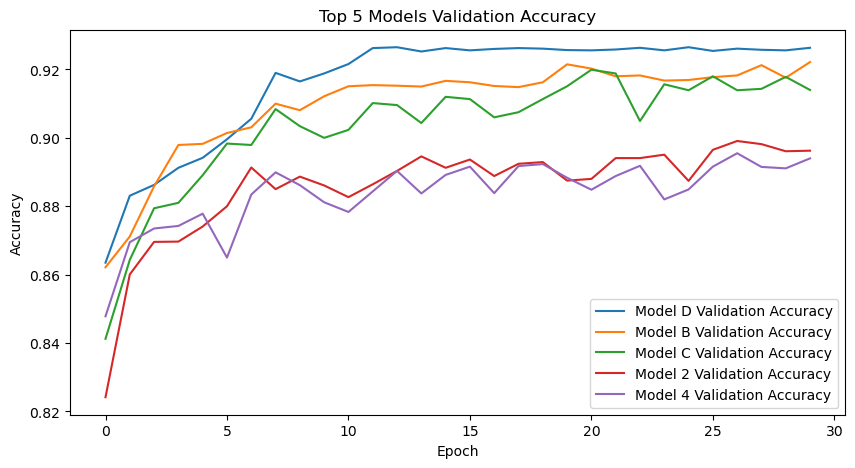

In [108]:
# plot top 5 models historical accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_d.history['val_accuracy'], label='Model D Validation Accuracy')
plt.plot(history_b.history['val_accuracy'], label='Model B Validation Accuracy')
plt.plot(history_c.history['val_accuracy'], label='Model C Validation Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Model 4 Validation Accuracy')
plt.title('Top 5 Models Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

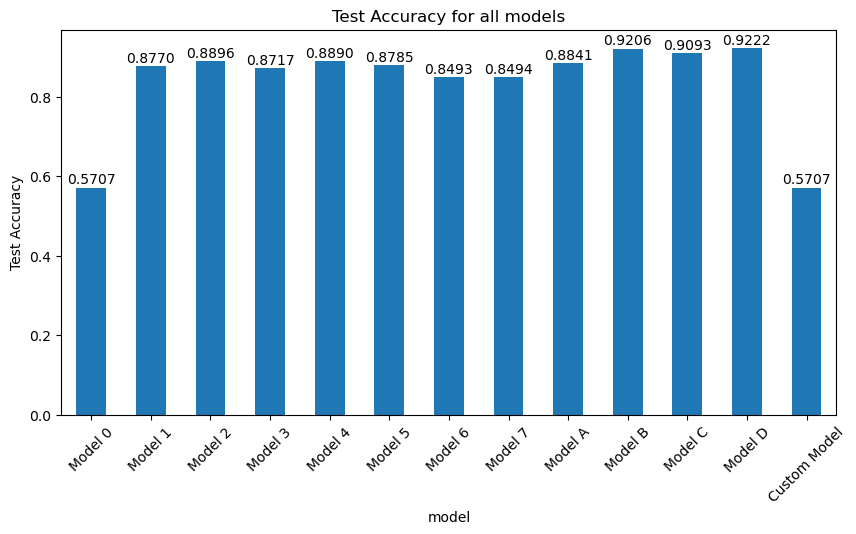

In [110]:
# plot bar chart of test accuracy for all models
plt.figure(figsize=(10, 5))
models.set_index('model')['test_accuracy'].plot(kind='bar')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for all models')
# add labels
for i, v in enumerate(models['test_accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.xticks(rotation=45)
plt.show()